In [2]:
# import required packages-

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt

In [3]:
# Set input paramaters such as titles, colours and squad file.abs

team_name = "Aberdeen"

season_start = 2025

squadfile = 'aberdeen.csv'

colours = {
    "cl_background":"#000000",
    "cl_foreground":"#FFFFFF",
    "cl_secondary":"#999999",
    "cl_alt_1":"#d61f34",
    "cl_alt_2":"#3A86FF",
    "cl_alt_3":"#FFBE0B",
    "cl_alt_4":"#3EC300",
    "cl_alt_5":"#595959"}


title = "Squad age distribution for " + team_name + " season starting " + str(season_start) 
subtitle = "On basis of current date: " + datetime.datetime.now().strftime("%d/%m/%Y") 

# Set Fonts
title_font = fnt.FontProperties(family="P052")
body_font = fnt.FontProperties(family="URW Gothic")

In [64]:
def calculate_age(born, season_start):
    start_date = datetime.datetime(season_start, 8,1)
    cutpoint = ((start_date.month > born.dt.month) & (start_date.day > born.dt.day))
    age = start_date.year - born.dt.year 
    age[cutpoint] = age -1
    return age

In [65]:
# read in and dispaly header of csv files to check.
squad = pd.read_csv(squadfile)
squad["Date of Birth"] = pd.to_datetime(squad["Date of Birth"], dayfirst=True)
squad["Age"] = calculate_age(squad["Date of Birth"],season_start)
squad["Years Remaining"] = squad["Contract Expiry"] - season_start

squad.head()


,First Name,Last Name,Date of Birth,Position,Contract Expiry,Status,Age,Years Remaining
0,Dimitar,Mitov,1997-01-22,GK,2027,N,28,2
1,Kristers,Tobers,2000-12-13,RCB,2028,N,25,3
2,Mats,Knoester,1998-11-19,LCB,2029,N,27,4
3,Gavin,Molloy,2001-10-19,LCB,2027,N,24,2
4,Jack,Milne,2003-02-10,RCB,2029,N,22,4


In [66]:
formation = pd.read_csv("formation.csv") 
sorting_key = {}

In [67]:
test=formation["name"].to_dict()
inverted_dict = {value: key for key, value in test.items()}

print(inverted_dict)

{'GK': 0, 'RB': 1, 'RCB': 2, 'LCB': 3, 'LB': 4, 'RDM': 5, 'LDM': 6, 'RW': 7, 'AM': 8, 'LW': 9, 'ST': 10}


In [68]:
sorted_squad = squad.sort_values(by=["Position"], key=lambda x: x.map(inverted_dict)).reset_index(drop=True)



Text(0.5, 0, 'Age')

findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.


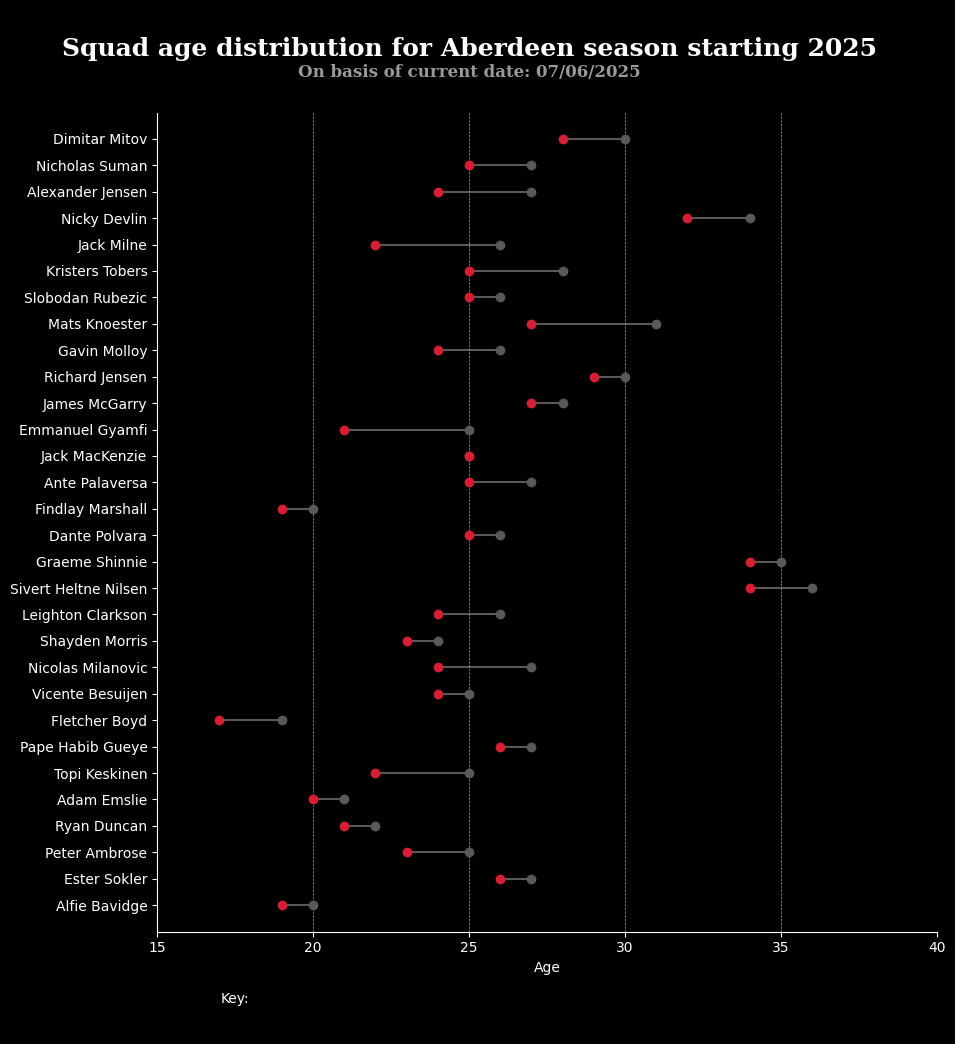

In [69]:
fig = plt.figure(figsize=(780/100,1024/100))
fig.patch.set_facecolor(colours["cl_background"])

# Add axis for header section, key and pitch
ax1 = fig.add_axes([0, 0.9, 1, .1], facecolor=colours["cl_background"])
ax2 = fig.add_axes([0.1, 0.1, 1, .8], facecolor=colours["cl_background"])
ax3 = fig.add_axes([0, 0, 1, .1], facecolor=colours["cl_background"])

ax1.axis(False)
ax3.axis(False)

# Place header, subheader and keys
ax1.text(
    x=0.5, 
    y=.55, 
    s=title, 
    fontsize=18, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_foreground"], 
    ha='center'
)

ax1.text(
    x=0.5, 
    y=.35, 
    s=subtitle, 
    fontsize=12, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_secondary"], 
    ha='center'
)

ax3.text(
    x=0.2, 
    y=.3, 
    s='Key:', 
    fontsize=10, 
    fontproperties=body_font,  
    color=colours["cl_foreground"], 
    ha='center'
)


# Plot Ages

player_index=range(1,len(sorted_squad.index)+1)

ax2.hlines(y=player_index, xmin=sorted_squad["Age"], xmax=(sorted_squad["Age"]+sorted_squad["Years Remaining"]), color=colours["cl_alt_5"],zorder=1)
ax2.scatter(sorted_squad["Age"], player_index, c=colours["cl_alt_1"], zorder=3)
ax2.scatter((sorted_squad["Age"]+sorted_squad["Years Remaining"]), player_index, c=colours["cl_alt_5"], zorder=2)
ax2.set_yticks(player_index)
ax2.set_yticklabels((sorted_squad["First Name"] + " " + sorted_squad["Last Name"]))
ax2.set_xlim(xmin=15,xmax=40)
ax2.set_ylim(ymin=len(sorted_squad.index)+1,ymax=0)
ax2.spines['bottom'].set_color(colours["cl_foreground"])
ax2.spines['left'].set_color(colours["cl_foreground"])
ax2.tick_params(axis='x', colors=colours["cl_foreground"])
ax2.tick_params(axis='y', colors=colours["cl_foreground"])
ax2.grid(axis = 'x', color = colours["cl_secondary"], linestyle = '--', linewidth = 0.5)
ax2.set_xlabel("Age",color=colours["cl_foreground"])
